## k-평균을 사용한 군집
### k-means 군집 사용

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# 데이터로드

iris=datasets.load_iris()
features=iris.data

In [3]:
# 특성 표준화하기

scaler=StandardScaler()
features_std=scaler.fit_transform(features)

In [5]:
# k-평균 객체 생성

cluster=KMeans(n_clusters=3, random_state=0, n_jobs=-1)

In [6]:
# 모델 훈련

model=cluster.fit(features_std)

k-평균 군집은 가장 널리 사용하는 군집 알고리즘 중 하나이다.

k-평균 군집에서 알고리즘은 샘플을 k 개의 그룹으로 나눈다. 각 그룹은 거의 동일한 분산을 가진다.

그룹의 개수 k는 하이퍼파라미터로 사용자가 지정해야 한다.

***
### K-평균 군집 작동 방식

1. k 개의 클러스터 '중심' 포인트를 랜덤한 위치에 생성
2. 각 샘플에 대해
    a. 각 샘프과 k개의 중심 포인트 사이 거리를 계산
    b. 샘플을 가장 가까운 중심 포인트의 클러스터에 할당
3. 중심 포인트를 해당하는 클러스터의 평균(중심) 으로 이동
4. 더이상 샘플의 클러스터 소속이 바뀌지 않을 때까지 단계 2와 단계 3을 반복

***
### k-평균 군집의 가정

1. 클러스터가 둥그런 모양으로 간주 (원형, 타원형)
2. 모든 특성은 동일한 스케일을 가짐
3. 클러스터 크기는 균등함 (각 클러스터마다 비슷한 수의 샘플을 가짐)

위의 가정을 만족하지 못한다면 다른 군집 알고리즘을 사용해야 한다

In [7]:
# 예측 클래스 확인

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [8]:
# 진짜 클래스 확인

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### k-평균 군집의 가장 중요한 점은 적절한 수의 k개를 지정해주는 것이다. 클러스터의 수가 모델의 성능을 좌우한다

In [9]:
# 새로운 샘플 생성

new_observation=[[0.8,0.8,0.8,0.8]]

In [10]:
# 샘플의 클러스터 예측

model.predict(new_observation)

array([0])

가장 가까운 중심 포인트의 클러스터가 샘플의 클러스터로 예측된다

In [11]:
# 중심확인

model.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

K-Means ++ 알고리즘은 중심 포인트 하나를 먼저 랜덤하게 선택하고,
그 다음부터는 이전 중심 포인트와의 거리를 고려하여 다음 중심 포인트를 선택한다.

사이킷런의 KMeans 클래스의 init 매개변수 기본값이 K-Means++ 알고리즘을 의미하는 k-means++ 이다.

***
KMeans 클래스는 n_init 횟수만큼 반복하여 최상의결과를 만드는 중심 포인트를 찾는다.

n_init 의 기본값은 10이고 비교하는 기준은 **샘플과 클러스터 중심까지의 거리 합**이다.

이를 **이너셔(inertia) 라고 부르며 inertia_ 속성에 저장되어 있다**

In [12]:
model.inertia_

139.82049635974982

In [13]:
'''
score 메소드에서 반환하는 값이 이너셔 이며, score 메소드는 좋을수록 값이 커야 하기 때문에 이너셔의 음수값을 반환한다
'''

model.score(features_std)

-139.82049635974982

In [14]:
'''
KMeans 클래스는 샘플 데이터를 각 클러스터까지 거리로 변환하는 transform 메소드도 제공한다
'''
# 이 예시 에서는 4차원 특성 공간이 3차원 특성공간 (k=3) 으로 변환된다.

model.transform(new_observation)

array([[0.83965108, 3.45674596, 2.00748231]])

n_clusters 매개변수의 기본값은 8 이며, 적절한 n_clusters 값을 결정하려면

n_clusters 값을 바꾸어 가며 이너셔 값이 크게 변화는 위치를 찾는다.

In [15]:
import matplotlib.pyplot as plt

In [19]:
ks=range(1,10)
inertia=list()

for k in ks:
    model=KMeans(n_clusters=k, random_state=0, n_jobs=-1)
    model.fit(features_std)
    inertia.append(model.inertia_)

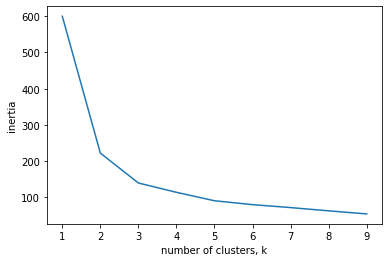

In [21]:
plt.plot(ks, inertia)
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

k 의 개수가 3~4개 이상 늘어나면 이너셔의 감소가 크게 줄어들고 있으므로, 클러스터의 개수는 3개 혹은 4개가 적당하다.

## k-평균 군집 속도 향상하기
### 미니배치 k-평균 사용

In [22]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

In [23]:
# 데이터 로드

iris=datasets.load_iris()
features=iris.data

In [24]:
# 특성 표준화

scaler=StandardScaler()
features_std=scaler.fit_transform(features)

In [25]:
# k-평균 객체 생성

cluster=MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)

In [26]:
# 모델 훈련

model=cluster.fit(features_std)

미니배치 k-평균은 k-평균 알고리즘과 비슷하다.

차이점은 미니배치 k-평균은 전체 샘플이 아니라 랜덤샘플에 대해서만 모델을 수행한다.

이는 성능을 조금 희생하는 대신 알고리즘이 수렴하는데(데이터 학습) 드는 시간을 대폭 줄여준다.

***

batch_size 는 각 배치에 랜덤하게 선택할 샘플의 수를 조절한다.

배치사이즈가 클수록 훈련과정에 계산 비용이 많이 필요하다.

***

MiniBatchKMeans 클래스는 KMeans 를 상속하기 때문에 대부분 동일한 매개변수를 제공한다.

훈련 세트가 너무 클 경우 하나의 넘파이 배열을 전달하기가 어렵다.

이런 경우 MiniBatchKMeans 클래스 밖에서 데이터를 조금씩 전달하면서 훈련할 수 있는 **partial_fit** 메소드를 사용한다.

In [27]:
# 훈련세트를 세 덩어리로 나누어 partial_fit 메소드를 호출하는 예시

mb_kmeans=MiniBatchKMeans()

for i in range(3):
    mb_kmeans.partial_fit(features_std[i*50:(i+1)*50])

## 평균이동을 사용한 군집
### 클러스터 수나 모양을 가정하지 않고 샘플을 그룹으로 나누기

In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

In [29]:
# 데이터로드

iris=datasets.load_iris()
features=iris.data

In [30]:
# 특성 표준화

scaler=StandardScaler()
features_std=scaler.fit_transform(features)

In [31]:
# meanshift 객체 생성

cluster=MeanShift(n_jobs=-1)

In [32]:
# 모델 훈련

model=cluster.fit(features_std)

MeanShift 의 매개변수

- bandwidth : 샘플이 이동 방향을 결정하기 위해 사용하는 면적(커널)의 반경, 수동으로 지정할 수 있지만 기본적으로 합리적인 bandwidth 가 자동으로 추정된다(계산 비용이 많이듬)

- cluster_all : 클러스터에 지정받지 못한 샘플을 가까운 샘플의 커널에 할당 하는지에 대한 여부, False 로 지정시 다른 커널에 할당을 하지않고 해당 샘플의 레이블을 -1 로 설정

In [33]:
# 훈련 샘플의 클래스 레이블 확인

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
# 클러스터 중심 확인

model.cluster_centers_

array([[ 0.50161528, -0.32287436,  0.65393539,  0.65261739],
       [-1.05954571,  0.75811468, -1.2998088 , -1.25401594]])

## DBSCAN 을 사용한 군집
### 샘플의 밀집 영역을 클러스터로 그룹핑하기

In [35]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [36]:
# 데이터 로드

iris=datasets.load_iris()
features=iris.data

In [37]:
# 특성 표준화

scaler=StandardScaler()
features_std=scaler.fit_transform(features)

In [38]:
# DBSCAN 객체 생성

cluster=DBSCAN(n_jobs=-1)

In [39]:
# 모델 훈련

model=cluster.fit(features_std)

DBSCAN 은 많은 샘플이 밀집되어 있는 영역이 클러스터라는 아이디어에서 창안되었다.

따라서 클러스터 모양에 어떠한 가정도 하지 않는다.

처리방식은 다음과 같다.

***
**<처리방식>**

1. 랜덤한 샘플 x를 선택한다

2. x가 최소한의 가까운 이웃을 가지고 있다면 클러스터의 일부로 간주한다.

3. 단계 2를 모든 x의 이웃과 이웃의 이웃 등에 대해 재귀적으로 반복한다. 이들은 클러스터의 핵심 샘플이 된다.

4. 단계 3이 가까운 샘플에 대해 모두 진행되면 새로운 랜덤 샘플을 선택한다(단계 1부터 다시 반복)
***

이런 단계가 완료되면 여러 클러스터에 속한 핵심 샘플을 얻는다.

최종적으로 클러스터에 가깝지만 핵심 샘플이 아닌 샘플을 클러스터의 일부로 삼고,

어떤 클러스터와도 가깝게 있지 않은 샘플은 이상치로 레이블이 된다.

***

DBSCAN의 주요 매개변수 세 개는 다음과 같다

- eps : 다른 샘플을 이웃으로 고려하기 위한 최대 거리

- min_samples: 핵심 샘플로 가준하기 위해 eps 거리 내에 필요한 최소 샘플 개수

- metric : eps에서 사용할 거리 측정 방식. (ex : minkowski, euclidean // 민코프스키 거리가 사용되면 매개변수 p를 사용해 거듭제곱 수 지정)

In [40]:
# 클러스터 소속 확인

model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [41]:
# DBSCAN 에서 찾은 핵심 샘플의 인덱스는 core_sample_indices_ 속성에 저장되어 있다.

model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147], dtype=int64)

DBSCAN 은 알고리즘 특성상 새로운 데이터에 대한 예측을 할 수 없다.

훈련 데이터에 대한 예측을 얻으려면 fit_predict 메소드를 사용한다

In [42]:
cluster.fit_predict(features_std)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

## 계층적 병합을 사용한 군집
### 클러스터 계층을 사용하여 샘플을 그룹으로 나누기

In [43]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [44]:
# 데이터 로드

iris=datasets.load_iris()
features=iris.data

In [45]:
# 특성 표준화

scaler=StandardScaler()
features_std=scaler.fit_transform(features)

In [46]:
# 병합 군집 객체 생성

cluster=AgglomerativeClustering(n_clusters=3)

In [47]:
# 모델 훈련

model=cluster.fit(features_std)

병합 군집(agglomerative clustering) 은 강력하고 유연한 계층적 군집 알고리즘이다.

병합 군집은 모든 샘플이 각자 하나의 클러스터로 시작한다.

그다음 어던 조건에 부합하는 클러스터들이 서로 병합된다.

이 과정이 어떤 종료 조건에 도달할 때까지 반복되어 클러스터가 커진다.

사이킷런의 AgglomerativeClustering 클래스는 linkage 매개변수를 사용하여 다음과 같은 내용을 최소화하는 병합 전략을 결정한다.

- ward : 병합된 클러스터의 분산
- average : 두 클러스터 샘플 간의 평균 거리
- complete : 두 클러스터 샘플 간의 최대 거리
- single : 두 클러스터 샘플 간의 최소 거리

***

유용한 매개변수가 두 개 더 있다.

- affinity : linkage에서 사용할 거리 측정 방식을 결정한다(minkowski, euclidean 등)
- n_clusters : 이 군집 알고리즘이 찾을 클러스터 수를 지정한다

In [48]:
# labels_ 속성을 사용해 각 샘플이 속한 클러스터 확인

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
# DBSCAN 과 마찬가지로 새로운 데이터에 대한 예측을 수행할 수 없기 때문에 fit_predict 메소드만 제공한다

cluster.fit_predict(features_std)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)